### Dimensionality Reduction Algorithms - PCA
- PCA falls into the unsupervised learning group of algorithms known as Dimensionality Reduction, which, as the name suggests, find an approximate version of the dataset using fewer features.
- Used for exploring and visualizing via groupings or relationships in the data
- Often visualized using a 2-D scatterplot
- Also used to find features for supervised learning (where we apply train_test_split)

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# each feature should be centered at 0 and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)

pca = PCA(n_components = 2).fit(X_normalized)

X_pca = pca.transform(X_normalized)
print(X_cancer.shape, X_pca.shape)

(569, 30) (569, 2)


Took 569 by 30 down to 569 by 2. Plotting the PCA-transformed version of the breast cancer dataset. We can see that malignant and benign cells cluster between two groups and can apply a linear classifier to this two dimensional representation of the dataset.

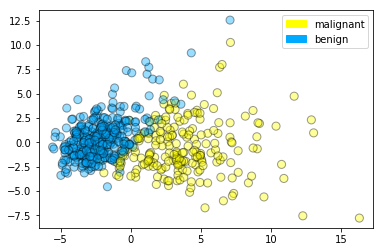

In [34]:
import matplotlib.pyplot as plt
from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca, y_cancer, ['malignant', 'benign'])

Plotting the magnitude of each feature value for the first two principal components.

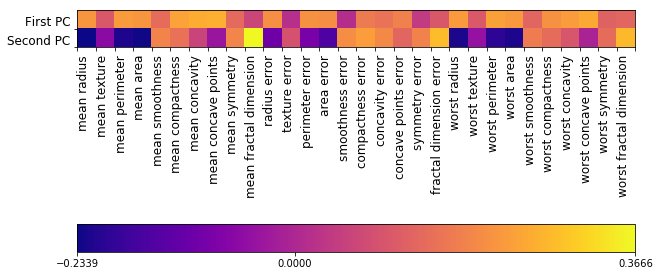

In [38]:
fig = plt.figure(figsize=(10, 5))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0,
                                              pca.components_.max()], pad=0.65);